## Lesson 6 : Numerical Computing with Python and Numpy

This tutorial series is a beginner-friendly introduction to programming and data analysis using the Python programming language. These tutorials take a practical and coding-focused approach. The best way to learn the material is to execute the code and experiment with it yourself. Check out the full series here: 

1. [First Steps with Python and Jupyter](https://jovian.ai/aakashns/first-steps-with-python)
2. [A Quick Tour of Variables and Data Types](https://jovian.ai/aakashns/python-variables-and-data-types)
3. [Branching using Conditional Statements and Loops](https://jovian.ai/aakashns/python-branching-and-loops)
4. [Writing Reusable Code Using Functions](https://jovian.ai/aakashns/python-functions-and-scope)
5. [Reading from and Writing to Files](https://jovian.ai/aakashns/python-os-and-filesystem)
6. [Numerical Computing with Python and Numpy](https://jovian.ai/aakashns/python-numerical-computing-with-numpy)
7. [Analyzing Tabular Data using Pandas](https://jovian.ai/aakashns/python-pandas-data-analysis)
8. [Data Visualization using Matplotlib & Seaborn](https://jovian.ai/aakashns/python-matplotlib-data-visualization)
9. [Exploratory Data Analysis - A Case Study](https://jovian.ai/aakashns/python-eda-stackoverflow-survey)

### Numerical Computing with Python and Numpy

![](https://i.imgur.com/mg8O3kd.png)
This tutorial series is a beginner-friendly introduction to programming and data analysis using the Python programming language. These tutorials take a practical and coding-focused approach. The best way to learn the material is to execute the code and experiment with it yourself. 

<img src="Pictures\Saved Pictures\IACentre_OW.png" align ="left" width="210">, 
<img src="Pictures\Saved Pictures\IACentre_HW.png" align = "right" width="210">

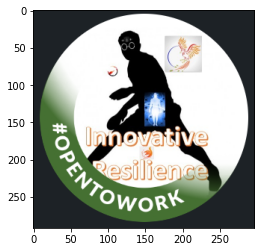

In [1]:
#### This another way but using coding to display the same image

import matplotlib.pyplot as plt

import matplotlib.image as img

path='Pictures\\Saved Pictures\\'

im = img.imread('Pictures\Saved Pictures\IACentre_OW.png')

plt.imshow(im)

In [2]:
This tutorial covers the following topics:

- Working with numerical data in Python
- Going from Python lists to Numpy arrays
- Multi-dimensional Numpy arrays and their benefits
- Array operations, broadcasting, indexing, and slicing
- Working with CSV data files using Numpy

SyntaxError: invalid syntax (2945072236.py, line 1)

## Working with numerical data

The "data" in *Data Analysis* typically refers to numerical data, e.g., stock prices, sales figures, sensor measurements, sports scores, database tables, etc. The [Numpy](https://numpy.org) library provides specialized data structures, functions, and other tools for numerical computing in Python. Let's work through an example to see why & how to use Numpy for working with numerical data.

> Suppose we want to use climate data like the temperature, rainfall, and humidity to determine if a region is well suited for growing apples. A simple approach for doing this would be to formulate the relationship between the annual yield of apples (tons per hectare) and the climatic conditions like the average temperature (in degrees Fahrenheit), rainfall (in  millimeters) & average relative humidity (in percentage) as a linear equation.
>
> `yield_of_apples = w1 * temperature + w2 * rainfall + w3 * humidity`

We're expressing the yield of apples as a weighted sum of the temperature, rainfall, and humidity. This equation is an approximation since the actual relationship may not necessarily be linear, and there may be other factors involved. But a simple linear model like this often works well in practice.

Based on some statical analysis of historical data, we might come up with reasonable values for the weights `w1`, `w2`, and `w3`. Here's an example set of values:

In [3]:
w1, w2, w3 = 0.3, 0.2, 0.5 

#Note the table  below was png file avaiable on a webpage

Given some climate data for a region, we can now predict the yield of apples. Here's some sample data:

<img src="https://i.imgur.com/TXPBiqv.png" style="width:360px;">

To begin, we can define some variables to record climate data for a region.

In [4]:
kanto_temp = 73
kanto_rainfall = 67
kanto_humidity = 43

We can now substitute these variables into the linear equation to predict the yield of apples.

In [5]:
kanto_yield_apples = kanto_temp * w1 + kanto_rainfall * w2 + kanto_humidity * w3
kanto_yield_apples
print("The expected yield of apples in Kanto region is {} tons per hectare.".format(kanto_yield_apples))

The expected yield of apples in Kanto region is 56.8 tons per hectare.


To make it slightly easier to perform the above computation for multiple regions, we can represent the climate data for each region as a **vector**, i.e., a list of numbers.

In [6]:
kanto = [73, 67, 43]
johto = [91, 88, 64]
hoenn = [87, 134, 58]
sinnoh = [102, 43, 37]
unova = [69, 96, 70]

The three numbers in each vector represent the temperature, rainfall, and humidity data, respectively. 

We can also represent the set of weights used in the formula as a vector.

In [7]:
weights = [w1, w2, w3]
region = [kanto, johto, hoenn, sinnoh, unova]

In [8]:
region

[[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]]

We can now write a function `crop_yield` to calcuate the yield of apples (or any other crop) given the climate data and the respective weights.

In [9]:
def crop_yield(region, weights):
    result = 0
    for x, w in zip(region, weights):
        result += x * w #make sure the letter case is consistent
    return result

In [10]:
crop_yield(kanto, weights)


56.8

In [11]:
crop_yield(johto, weights)

76.9

In [12]:
crop_yield(unova, weights)

74.9

## Going from Python lists to Numpy arrays


The calculation performed by the `crop_yield` (element-wise multiplication of two vectors and taking a sum of the results) is also called the *dot product*. Learn more about dot product here: https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/vector-dot-product-and-vector-length . 

The Numpy library provides a built-in function to compute the dot product of two vectors. However, we must first convert the lists into Numpy arrays.

Let's install the Numpy library using the `pip` package manager.

In [13]:
pip install numpy --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


Next, let's import the `numpy` module. It's common practice to import numpy with the alias `np`.

In [14]:
import numpy as np

We can now use the `np.array` function to create Numpy arrays.

In [15]:
kanto = np.array([73, 67, 43])

In [16]:
kanto

array([73, 67, 43])

In [17]:
weights = np.array([w1, w2, w3])

In [18]:
weights

array([0.3, 0.2, 0.5])

Numpy arrays have the type `ndarray`.

In [19]:
type(kanto)

numpy.ndarray

In [20]:
type(johto)

list

In [21]:
type(region)

list

In [22]:
type(weights)

numpy.ndarray

In [23]:
weights[0]

0.3

In [24]:
kanto[2]

43

In [25]:
kanto

array([73, 67, 43])

## Operating on Numpy arrays

We can now compute the dot product of the two vectors using the `np.dot` function.

In [26]:
np.dot(kanto, weights)

56.8

We can achieve the same result with low-level operations supported by Numpy arrays: performing an element-wise multiplication and calculating the resulting numbers' sum.

In [27]:
(kanto * weights).sum()

56.8

The `*` operator performs an element-wise multiplication of two arrays if they have the same size. The `sum` method calculates the sum of numbers in an array.

In [28]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

In [29]:
arr1 * arr2

array([ 4, 10, 18])

In [30]:
arr1.sum()

6

In [31]:
arr2.sum()

15

In [32]:
(arr1 * arr2).sum()

32

## Benefits of using Numpy arrays

Numpy arrays offer the following benefits over Python lists for operating on numerical data:

- **Ease of use**: You can write small, concise, and intuitive mathematical expressions like `(kanto * weights).sum()` rather than using loops & custom functions like `crop_yield`.
- **Performance**: Numpy operations and functions are implemented internally in C++, which makes them much faster than using Python statements & loops that are interpreted at runtime

Here's a comparison of dot products performed using Python loops vs. Numpy arrays on two vectors with a million elements each.

In [33]:
# Python lists
arr1 = list(range(1000)) 
arr2 = list(range(1000, 2000)) #error occur to this e.g. x10

# Numpy arrays
arr1_np = np.array(arr1)
arr2_np = np.array(arr2)

In [34]:
%%time
result = 0
for x1, x2 in zip(arr1, arr2):
    result += x1*x2
result

CPU times: total: 0 ns
Wall time: 0 ns


832333500

In [35]:
%%time
np.dot(arr1_np, arr2_np)

CPU times: total: 0 ns
Wall time: 0 ns


832333500

As you can see, using `np.dot` is x- times faster than using a `for` loop. This makes Numpy especially useful while working with really large datasets with tens of thousands or millions of data points.

Let's save our work before continuing.

## Multi-dimensional Numpy arrays 

We can now go one step further and represent the climate data for all the regions using a single 2-dimensional Numpy array.

In [36]:
climate_data = np.array([[73, 67, 43],
                         [91, 88, 64],
                         [87, 134, 58],
                         [102, 43, 37],
                         [69, 96, 70]])

In [37]:
climate_data

array([[ 73,  67,  43],
       [ 91,  88,  64],
       [ 87, 134,  58],
       [102,  43,  37],
       [ 69,  96,  70]])

If you've taken a linear algebra class in high school, you may recognize the above 2-d array as a matrix with five rows and three columns. Each row represents one region, and the columns represent temperature, rainfall, and humidity, respectively.

Numpy arrays can have any number of dimensions and different lengths along each dimension. We can inspect the length along each dimension using the `.shape` property of an array.

<img src="https://fgnt.github.io/python_crashkurs_doc/_images/numpy_array_t.png" width="420">


In [38]:
# 2D array (matrix - # Rows, # Columns)
climate_data.shape

(5, 3)

In [39]:
weights

array([0.3, 0.2, 0.5])

In [40]:
weights.shape

(3,)

In [41]:
# 3D array 
arr3 = np.array([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.5]]
                ])

In [42]:
arr3.shape

(2, 2, 3)

All the elements in a numpy array have the same data type. You can check the data type of an array using the `.dtype` property.

In [43]:
arr3.dtype

dtype('float64')

We can now compute the predicted yields of apples in all the regions, using a single matrix multiplication between `climate_data` (a 5x3 matrix) and `weights` (a vector of length 3). Here's what it looks like visually:

<img src="https://i.imgur.com/LJ2WKSI.png" width="240">

You can learn about matrices and matrix multiplication by watching the first 3-4 videos of this [Play List](https://www.youtube.com/watch?v=xyAuNHPsq-g&list=PLFD0EB975BA0CC1E0&index=1)

We can use the `np.matmul` function or the `@` operator to perform matrix multiplication.

In [44]:
np.matmul(climate_data, weights)

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [45]:
climate_data @ weights

array([56.8, 76.9, 81.9, 57.7, 74.9])

## Working with CSV data files

Numpy also provides helper functions reading from & writing to files. Let's download a file `climate.txt`, which contains 10,000 climate measurements (temperature, rainfall & humidity) in the following format:


```
temperature,rainfall,humidity
25.00,76.00,99.00
39.00,65.00,70.00
59.00,45.00,77.00
84.00,63.00,38.00
66.00,50.00,52.00
41.00,94.00,77.00
91.00,57.00,96.00
49.00,96.00,99.00
67.00,20.00,28.00
...
```

This format of storing data is known as *comma-separated values* or CSV. 

> **CSVs**: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. (Wikipedia)


To read this file into a numpy array, we can use the `genfromtxt` function.

In [46]:
import urllib.request

urllib.request.urlretrieve(
'https://gist.github.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/', 
    'climate.txt')

('climate.txt', <http.client.HTTPMessage at 0x20b925d8370>)

In [47]:
climate_data = np.genfromtxt('climate.txt', delimiter=',', skip_header=1)

In [48]:
climate_data

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [49]:
climate_data.shape

(10000, 3)

We can now perform a matrix multiplication using the `@` operator to predict the yield of apples for the entire dataset using a given set of weights.

In [50]:
weights = np.array([0.3, 0.2, 0.5])

In [51]:
yields = climate_data @ weights

In [52]:
yields

array([72.2, 59.7, 65.2, ..., 71.1, 80.7, 73.4])

In [53]:
yields.shape

(10000,)

Let's add the `yields` to `climate_data` as a fourth column using the [**`np.concatenate`**](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) function.

In [54]:
climate_results = np.concatenate((climate_data, yields.reshape(10000, 1)), axis=1)

In [55]:
climate_results

array([[25. , 76. , 99. , 72.2],
       [39. , 65. , 70. , 59.7],
       [59. , 45. , 77. , 65.2],
       ...,
       [99. , 62. , 58. , 71.1],
       [70. , 71. , 91. , 80.7],
       [92. , 39. , 76. , 73.4]])

There are a couple of subtleties here:

* Since we wish to add new columns, we pass the argument `axis=1` to `np.concatenate`. The `axis` argument specifies the dimension for concatenation.

*  The arrays should have the same number of dimensions, and the same length along each except the dimension used for concatenation. We use the [`np.reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) function to change the shape of `yields` from `(10000,)` to `(10000,1)`.

Here's a visual explanation of `np.concatenate` along `axis=1` (can you guess what `axis=0` results in?):

<img src="https://www.w3resource.com/w3r_images/python-numpy-image-exercise-58.png" width="300">

The best way to understand what a Numpy function does is to experiment with it and read the documentation to learn about its arguments & return values. Use the cells below to experiment with `np.concatenate` and `np.reshape`.

Let's write the final results from our computation above back to a file using the `np.savetxt` function.

In [56]:
climate_results

array([[25. , 76. , 99. , 72.2],
       [39. , 65. , 70. , 59.7],
       [59. , 45. , 77. , 65.2],
       ...,
       [99. , 62. , 58. , 71.1],
       [70. , 71. , 91. , 80.7],
       [92. , 39. , 76. , 73.4]])

In [57]:
np.savetxt('climate_results.txt', 
           climate_results, 
           fmt='%.2f', 
           delimiter=',',
           header='temperature,rainfall,humidity,yeild_apples', 
           comments='')

In [58]:
climate_results.shape

(10000, 4)

In [59]:
climate_results.dtype

dtype('float64')

In [60]:
#The results are written back in the CSV format to the file climate_results.txt
with open("climate_results.txt") as file:
    contents = file.read()
    print(contents)

temperature,rainfall,humidity,yeild_apples
25.00,76.00,99.00,72.20
39.00,65.00,70.00,59.70
59.00,45.00,77.00,65.20
84.00,63.00,38.00,56.80
66.00,50.00,52.00,55.80
41.00,94.00,77.00,69.60
91.00,57.00,96.00,86.70
49.00,96.00,99.00,83.40
67.00,20.00,28.00,38.10
85.00,31.00,95.00,79.20
78.00,46.00,34.00,49.60
31.00,40.00,63.00,48.80
52.00,77.00,85.00,73.50
28.00,66.00,77.00,60.10
32.00,50.00,57.00,48.10
31.00,79.00,53.00,51.60
45.00,76.00,48.00,52.70
80.00,52.00,27.00,47.90
24.00,45.00,90.00,61.20
20.00,89.00,84.00,65.80
32.00,20.00,96.00,61.60
56.00,44.00,74.00,62.60
93.00,70.00,80.00,81.90
62.00,87.00,73.00,72.50
85.00,48.00,90.00,80.10
87.00,86.00,93.00,89.80
43.00,57.00,69.00,58.80
28.00,71.00,44.00,44.60
44.00,95.00,58.00,61.20
88.00,48.00,46.00,59.00
80.00,50.00,38.00,53.00
27.00,75.00,89.00,67.60
93.00,61.00,73.00,76.60
31.00,87.00,62.00,57.70
38.00,94.00,44.00,52.20
55.00,93.00,55.00,62.60
56.00,22.00,47.00,44.70
38.00,64.00,79.00,63.70
26.00,22.00,40.00,32.20
27.00,98.00,24.00,39.

Numpy provides hundreds of functions for performing operations on arrays. Here are some commonly used functions:


* Mathematics: `np.sum`, `np.exp`, `np.round`, arithemtic operators 
* Array manipulation: `np.reshape`, `np.stack`, `np.concatenate`, `np.split`
* Linear Algebra: `np.matmul`, `np.dot`, `np.transpose`, `np.eigvals`
* Statistics: `np.mean`, `np.median`, `np.std`, `np.max`

> **How to find the function you need?** The easiest way to find the right function for a specific operation or use-case is to do a web search. For instance, searching for "How to join numpy arrays" leads to [this tutorial on array concatenation](https://cmdlinetips.com/2018/04/how-to-concatenate-arrays-in-numpy/). 

You can find a full list of array functions here: https://numpy.org/doc/stable/reference/routines.html

## Arithmetic operations, broadcasting and comparison

Numpy arrays support arithmetic operators like `+`, `-`, `*`, etc. You can perform an arithmetic operation with a single number (also called scalar) or with another array of the same shape. Operators make it easy to write mathematical expressions with multi-dimensional arrays.

In [61]:
arr2 = np.array([[1, 2, 3, 4], 
                 [5, 6, 7, 8], 
                 [9, 1, 2, 3]])

In [62]:
arr3 = np.array([[11, 12, 13, 14], 
                 [15, 16, 17, 18], 
                 [19, 11, 12, 13]])

In [63]:
# Adding a scalar
arr2 + 3

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12,  4,  5,  6]])

In [64]:
# Element-wise subtraction
arr3 - arr2

array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10]])

In [65]:
# Division by scalar
arr2 / 2

array([[0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. ],
       [4.5, 0.5, 1. , 1.5]])

In [66]:
# Modulus with scalar
arr2 % 4

array([[1, 2, 3, 0],
       [1, 2, 3, 0],
       [1, 1, 2, 3]], dtype=int32)

### Array Broadcasting

Numpy arrays also support *broadcasting*, allowing arithmetic operations between two arrays with different numbers of dimensions but compatible shapes. Let's look at an example to see how it works.

In [67]:
arr2 = np.array([[1, 2, 3, 4], 
                 [5, 6, 7, 8], 
                 [9, 1, 2, 3]])

In [68]:
arr2.shape

(3, 4)

In [69]:
arr4 = np.array([4, 5, 6, 7])

In [70]:
arr4.shape

(4,)

In [71]:
arr2 + arr4

array([[ 5,  7,  9, 11],
       [ 9, 11, 13, 15],
       [13,  6,  8, 10]])

When the expression `arr2 + arr4` is evaluated, `arr4` (which has the shape `(4,)`) is replicated three times to match the shape `(3, 4)` of `arr2`. Numpy performs the replication without actually creating three copies of the smaller dimension array, thus improving performance and using lower memory.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png" width="360">

Broadcasting only works if one of the arrays can be replicated to match the other array's shape.

In [72]:
arr5 = np.array([7, 8])

In [73]:
arr5.shape

(2,)

In [74]:
# arr2 + arr5

In the above example, even if `arr5` is replicated three times, it will not match the shape of `arr2`. Hence `arr2 + arr5` cannot be evaluated successfully. Learn more about broadcasting here: https://numpy.org/doc/stable/user/basics.broadcasting.html .

In [75]:
arr1 = np.array([[1, 2, 3], [3, 4, 5]])
arr2 = np.array([[2, 2, 3], [1, 2, 5]])

In [76]:
arr1 == arr2

array([[False,  True,  True],
       [False, False,  True]])

In [77]:
arr1 != arr2

array([[ True, False, False],
       [ True,  True, False]])

In [78]:
arr1 >= arr2

array([[False,  True,  True],
       [ True,  True,  True]])

In [79]:
arr1 < arr2

array([[ True, False, False],
       [False, False, False]])

Array comparison is frequently used to count the number of equal elements in two arrays using the `sum` method. Remember that `True` evaluates to `1` and `False` evaluates to `0` when booleans are used in arithmetic operations.

In [80]:
(arr1 == arr2).sum() # three-Trues

3

## Array indexing and slicing

Numpy extends Python's list indexing notation using `[]` to multiple dimensions in an intuitive fashion. You can provide a comma-separated list of indices or ranges to select a specific element or a subarray (also called a slice) from a Numpy array.

In [114]:
arr3 = np.array([
    [[11, 12, 13, 14], 
     [13, 14, 15, 19]], 
    
    [[15, 16, 17, 21], 
     [63, 92, 36, 18]], 
    
    [[98, 32, 81, 23],      
     [17, 18, 19.5, 43]]
                ])

In [115]:
arr3.shape

(3, 2, 4)

In [120]:
# Single element
arr3[1, 1 ,2]

36.0

In [137]:
# Subarray using ranges
arr3[1:, 0:1, :2]

array([[[15., 16.]],

       [[98., 32.]]])

In [128]:
# Mixing indices and ranges
arr3[1:, 1, 3]

array([18., 43.])

In [132]:
# Mixing indices and ranges
arr3[1:,1, :3 ]

array([[63. , 92. , 36. ],
       [17. , 18. , 19.5]])

In [138]:
# Using fewer indices
arr3[1]

array([[15., 16., 17., 21.],
       [63., 92., 36., 18.]])

In [140]:
arr3[:2, 1]

array([[13., 14., 15., 19.],
       [63., 92., 36., 18.]])

The notation and its results can seem confusing at first, so take your time to experiment and become comfortable with it. Use the cells below to try out some examples of array indexing and slicing, with different combinations of indices and ranges. Here are some more examples demonstrated visually:

<img src="https://scipy-lectures.org/_images/numpy_indexing.png" width="360">

## Other ways of creating Numpy arrays

Numpy also provides some handy functions to create arrays of desired shapes with fixed or random values. Check out the [official documentation](https://numpy.org/doc/stable/reference/routines.array-creation.html) or use the `help` function to learn more.

In [141]:
# All zeros
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [144]:
# All ones
np.ones([2, 2, 3])

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [145]:
# Identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [146]:
# Random vector
np.random.rand(5)

array([0.50203316, 0.96403746, 0.05318226, 0.91710153, 0.07522709])

In [147]:
# Random matrix
np.random.randn(2, 3) # rand vs. randn - what's the difference?

array([[ 0.11182245, -1.46037534,  0.11095077],
       [-0.03029944,  1.8121522 , -1.55411324]])

In [148]:
# Fixed value
np.full([2, 3], 42)

array([[42, 42, 42],
       [42, 42, 42]])

In [149]:
# Range with start, end and step
np.arange(10, 90, 3)

array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58,
       61, 64, 67, 70, 73, 76, 79, 82, 85, 88])

In [150]:
# Equally spaced numbers in a range
np.linspace(3, 27, 9)

array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.])

In [152]:
# Equally spaced numbers in a range
np.linspace(3, 24, 7)

array([ 3. ,  6.5, 10. , 13.5, 17. , 20.5, 24. ])

## Exercises

Try the following exercises to become familiar with Numpy arrays and practice your skills:

- Assignment on Numpy array functions: https://jovian.ai/aakashns/numpy-array-operations
- (Optional) 100 numpy exercises: https://jovian.ai/aakashns/100-numpy-exercises

## Summary and Further Reading

With this, we complete our discussion of numerical computing with Numpy. We've covered the following topics in this tutorial:

- Going from Python lists to Numpy arrays
- Operating on Numpy arrays
- Benefits of using Numpy arrays over lists
- Multi-dimensional Numpy arrays
- Working with CSV data files
- Arithmetic operations and broadcasting
- Array indexing and slicing
- Other ways of creating Numpy arrays


Check out the following resources for learning more about Numpy:

- Official tutorial: https://numpy.org/devdocs/user/quickstart.html
- Numpy tutorial on W3Schools: https://www.w3schools.com/python/numpy_intro.asp
- Advanced Numpy (exploring the internals): http://scipy-lectures.org/advanced/advanced_numpy/index.html

You are ready to move on to the next tutorial: [Analyzing Tabular Data using Pandas](https://jovian.ai/aakashns/python-pandas-data-analysis).